In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Data source
https://data.cityofchicago.org/

Applied filter when downloading datasets from Chicago Open Data Portal:
service request completion date between 1/1/2016 - 12/31/2016

# Task 1: Download and Merge Data

In [3]:
graffiti = pd.read_csv('311_Service_Requests_-_Graffiti_Removal.csv', index_col = 'Service Request Number')

In [4]:
graffiti.columns = [x.lower() for x in graffiti.columns]
graffiti.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'what type of surface is the graffiti on?',
       'where is the graffiti located?', 'street address', 'zip code',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'ssa', 'latitude', 'longitude', 'location'],
      dtype='object')

In [5]:
headers = ['creation_date', 'status', 'completion_date', 'type', 'zip', 'ward', 'police_district', 'community_area', 'lat', 'lon']
graffiti_sub = graffiti[['creation date', 'status', 'completion date', 'type of service request', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
graffiti_sub.columns = headers
graffiti_sub['file'] = 'graffiti'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
buildings = pd.read_csv('311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv', index_col = 'SERVICE REQUEST NUMBER')

In [7]:
buildings.columns = [x.lower() for x in buildings.columns]
buildings.columns
# Note that buildings data does not include completion date or status, so we 
# are unable to track whether a the service request was completed

Index(['service request type', 'date service request was received',
       'location of building on the lot (if garage, change type code to bgd).',
       'is the building dangerous or hazardous?',
       'is building open or boarded?',
       'if the building is open, where is the entry point?',
       'is the building currently vacant or occupied?',
       'is the building vacant due to fire?',
       'any people using property? (homeless, childen, gangs)',
       'address street number', 'address street direction',
       'address street name', 'address street suffix', 'zip code',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'latitude', 'longitude', 'location'],
      dtype='object')

In [8]:
buildings_headers = ['creation_date', 'type', 'zip', 'ward', 'police_district', 'community_area', 'lat', 'lon']
buildings_sub = buildings[['date service request was received', 'service request type', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
buildings_sub.columns = buildings_headers
buildings_sub['file'] = 'buildings'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
potholes = pd.read_csv('311_Service_Requests_-_Pot_Holes_Reported.csv', index_col = 'SERVICE REQUEST NUMBER')

In [10]:
potholes.columns = [x.lower() for x in potholes.columns]
potholes.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'current activity', 'most recent action',
       'number of potholes filled on block', 'street address', 'zip',
       'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'ssa', 'latitude', 'longitude', 'location'],
      dtype='object')

In [11]:
potholes_sub = potholes[['creation date', 'status', 'completion date', 'type of service request', 'zip', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
potholes_sub.columns = headers
potholes_sub['file'] = 'potholes'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [12]:
sanitation = pd.read_csv('311_Service_Requests_-_Sanitation_Code_Complaints.csv', index_col = 'Service Request Number')

In [13]:
sanitation.columns = [x.lower() for x in sanitation.columns]
sanitation.columns

Index(['creation date', 'status', 'completion date', 'type of service request',
       'what is the nature of this code violation?', 'street address',
       'zip code', 'x coordinate', 'y coordinate', 'ward', 'police district',
       'community area', 'latitude', 'longitude', 'location'],
      dtype='object')

In [14]:
sanitation_sub = sanitation[['creation date', 'status', 'completion date', 'type of service request', 'zip code', 'ward', 'police district', 'community area', 'latitude', 'longitude']]
sanitation_sub.columns = headers
sanitation_sub['file'] = 'sanitation'

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [15]:
df = pd.concat([graffiti_sub, buildings_sub, potholes_sub, sanitation_sub])
df.columns

Index(['community_area', 'completion_date', 'creation_date', 'file', 'lat',
       'lon', 'police_district', 'status', 'type', 'ward', 'zip'],
      dtype='object')

# Task 2: Summary statistics

In [16]:
df.columns

Index(['community_area', 'completion_date', 'creation_date', 'file', 'lat',
       'lon', 'police_district', 'status', 'type', 'ward', 'zip'],
      dtype='object')

In [17]:
# disregard duplicate requests
df = df.loc[(df['status'] != 'Open - Dup') & (df['status'] != 'Completed - Dup')]
df['status'].unique()

array(['Completed', nan, 'Open'], dtype=object)

In [18]:
df['creation_month'] = df['creation_date'].str.extract('(\d\d)')

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [19]:
df['completion_month'] = df['completion_date'].str.extract('(\d\d)')

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [20]:
# count by overall category
category = df['file'].value_counts()
category

graffiti      116193
potholes       37985
sanitation     20181
buildings       4472
Name: file, dtype: int64

In [21]:
# count by month
month = df['creation_month'].value_counts().sort_index()
month

01    13496
02    16036
03    17668
04    17400
05    17521
06    16317
07    14294
08    16629
09    12774
10    13202
11    12236
12    11258
Name: creation_month, dtype: int64

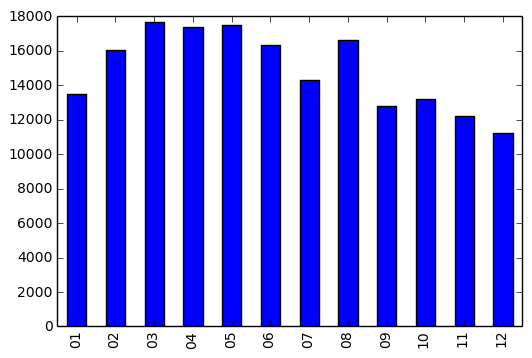

In [22]:
month.plot('bar')

In [23]:
month_df = month.to_frame()
month_df.reset_index(inplace=True)
month_df.columns = ['creation_month', 'count']
month_df

,creation_month,count
0,01,13496
1,02,16036
2,03,17668
3,04,17400
4,05,17521
5,06,16317
6,07,14294
7,08,16629
8,09,12774
9,10,13202


In [24]:
# count by category and month
month_category = df.groupby(['file', 'creation_month']).size()
month_category = month_category.to_frame()
month_category.reset_index(inplace = True)
month_category.columns = ['file', 'creation_month', 'count']

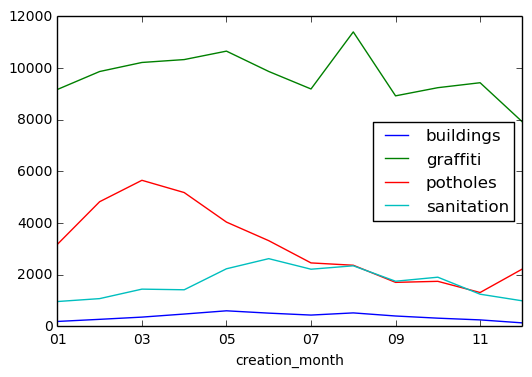

In [25]:
# plot of county by category by month
# source: http://stackoverflow.com/questions/29233283/plotting-multiple-lines-with-pandas-dataframe

fig, ax = plt.subplots()
labels = []
for key, group in month_category.groupby(['file']):
    ax = group.plot(ax = ax, kind = 'line', x = 'creation_month', y = 'count')
    labels.append(key)
ax.legend(labels, loc='best')
plt.show()

In [26]:
# graffiti subcateogries
graffiti_subcat = graffiti['where is the graffiti located?'].value_counts()
graffiti_subcat

Front                  38212
Side                   16898
Pole                   11358
Garage                  9893
Rear                    8337
Traffic Control Box     5407
Alley                   5330
Door                    4377
Sign                    4358
Dumpster                3805
Fence                   3310
Viaduct                 2296
Garbage Cart            1993
Mail Box                1417
Newspaper Box           1379
Bench                    790
Express Way Job          536
Overpass                 284
Hydrant                   76
Phone                     71
Name: where is the graffiti located?, dtype: int64

In [27]:
# buildings subcategories
# No approrpiate subcategorizations of buildings 311 data

In [28]:
# potholes subcategories
potholes_subcat = potholes['most recent action'].value_counts()
potholes_subcat

Pothole Patched                                                        31125
No Potholes Found                                                       3530
Completed Upon Arrival                                                  1479
Street Resurfaced                                                        652
CDOT Pavement Cave-In Survey Transfer Outcome                            317
WM Sewer Cave In Inspection Transfer Outcome                             264
CDOT Alley Pot Hole Transfer Outcome                                     214
CDOT Inspect Public Way Survey Transfer Outcome                          120
No Action - See Remarks in Description                                   114
No Such Address Found                                                     43
Not Within CDOT Jurisdiction                                              41
Follow-on Pot Hole in Street Created                                      34
CDOT Pavement Buckle or Speed Hump Transfer Outcome                       18

In [29]:
# sanitation subcategories
sanitation_subcat = sanitation['what is the nature of this code violation?'].value_counts()
sanitation_subcat

Other                                  8327
Garbage in yard                        3812
Garbage in alley                       2995
Overflowing carts                      1627
Dumpster not being emptied             1574
Dog feces in yard                      1150
Construction Site Cleanliness/Fence     859
Standing water                          299
Graffiti Commercial Vehicle              26
Name: what is the nature of this code violation?, dtype: int64

In [50]:
# count by community area
community_area = df['community_area'].value_counts()
community_area.head(10)

24.0    11126
22.0     9434
58.0     6718
21.0     6042
31.0     5722
6.0      5585
30.0     5523
16.0     5254
63.0     5141
19.0     4895
Name: community_area, dtype: int64

In [49]:
# count by ward
ward = df['ward'].value_counts()
ward.head(10)

14.0    9943
1.0     9224
12.0    8327
33.0    7393
23.0    6973
47.0    6922
25.0    6478
35.0    6207
32.0    5639
27.0    4402
Name: ward, dtype: int64

In [60]:
# response time
df['completion_date'] = pd.to_datetime(df['completion_date'], format='%m/%d/%Y')
df['creation_date'] = pd.to_datetime(df['creation_date'], format='%m/%d/%Y')
df['response_time'] = df['completion_date'] - df['creation_date']

In [74]:
# response time by category
HERE

TypeError: ufunc true_divide cannot use operands with types dtype('int64') and dtype('<m8[D]')

# Task 3: Interesting Observations

The highest number of service requests The spring and summer months 